# Задача 4 <br>
Выполнила: Борисова Мария, 120М группа

Задание: каждую капиллярную кривую описать функцией Брукс-Кори со своими уникальными величинами Swi, Pd и n.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

Загрузка данных

In [2]:
data = pd.read_excel('ККД задание 1М.xlsx')
data

,Скважина,Стратиграфическая единица,Лабораторный номер образца,Метод исследования,"Интервал отбора, м (кровля)","Интервал отбора, м (подошва)","Место взятия, м",Литологическое описание,"Пористость, %","Проницаемость, мД","Водонасыщенность, %","Капиллярное давление, МПа"
0,6747бис,ВК3,33874-07,Полупроницаемой мембраны,1574.0,1581.0,0.66,Алевролит мелкозернистый глинистый,23.36,9.2225,100.000000,0.0027
1,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0057
2,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0100
3,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0150
4,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0250
...,...,...,...,...,...,...,...,...,...,...,...,...
150,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.756303,0.1000
151,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.600840,0.2000
152,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.739496,0.4000
153,6747бис,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.810924,0.7000


In [4]:
colum_with_NaN = data.columns[1:10]
data[colum_with_NaN] = data[colum_with_NaN].ffill()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Скважина                      155 non-null    object 
 1   Стратиграфическая единица     155 non-null    object 
 2   Лабораторный номер образца    155 non-null    object 
 3   Метод исследования            155 non-null    object 
 4   Интервал отбора, м (кровля)   155 non-null    float64
 5   Интервал отбора, м (подошва)  155 non-null    float64
 6   Место взятия, м               155 non-null    float64
 7   Литологическое описание       155 non-null    object 
 8   Пористость, %                 155 non-null    float64
 9   Проницаемость, мД             155 non-null    float64
 10  Водонасыщенность, %           155 non-null    float64
 11  Капиллярное давление, МПа     155 non-null    float64
dtypes: float64(7), object(5)
memory usage: 14.7+ KB


Получение Swi и Pc по образцам скважин

In [6]:
data['Лабораторный номер образца'].unique()

array(['33874-07', '3658/12', '3660/12', '42783-08', '12360/11',
       '24900-07', '24914-07', '24903-07', '18452-05', '21777-05',
       '23133-04', '2601/13', '12214/11', '7210/09', '33806-07'],
      dtype=object)

In [7]:
data['Скважина'].unique()

array(['6747бис', 8437, '14791бис', 8656, '40006Р', 4992, '40004P', 4304],
      dtype=object)

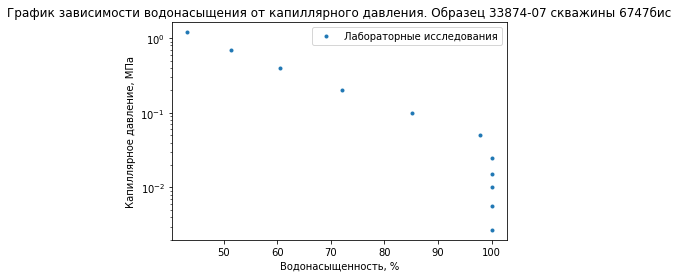

In [8]:
df = data[data['Лабораторный номер образца'] == '33874-07']
df1 = df[df['Скважина'] == '6747бис']
plt.plot(df1['Водонасыщенность, %'], df1['Капиллярное давление, МПа'], '.')
plt.yscale('log')
plt.xlabel('Водонасыщенность, %')
plt.ylabel('Капиллярное давление, МПа')
plt.legend(['Лабораторные исследования'])
plt.title('График зависимости водонасыщения от капиллярного давления. Образец 33874-07 скважины 6747бис');

In [9]:
#расчет Pd
name_well_sample = []
Pd_wells = []

for sample in data['Лабораторный номер образца'].unique():
    df = data[data['Лабораторный номер образца'] == sample]
    for well in df['Скважина'].unique():
        df1 = df[df['Скважина'] == well]

        P = np.array(sorted(df1['Водонасыщенность, %'][df1['Водонасыщенность, %'] > 85]))
        P_difference = np.diff(P)
        max2 = np.sort(P_difference)[-1]
        
        Pd_wells += [df1['Капиллярное давление, МПа'][df1['Водонасыщенность, %'] == P[np.where(P_difference == max2)][0]].values[0] if P[np.where(P_difference == max2)][0] < 100 else df1['Капиллярное давление, МПа'][df1['Водонасыщенность, %'] == sorted(df1['Водонасыщенность, %'].unique())[-2]].values[0]]
        name_well_sample += [(sample, well)]
        
name_well_sample, Pd_wells

([('33874-07', '6747бис'),
  ('3658/12', 8437),
  ('3660/12', 8437),
  ('42783-08', '14791бис'),
  ('12360/11', 8656),
  ('24900-07', '40006Р'),
  ('24914-07', '40006Р'),
  ('24903-07', '40006Р'),
  ('18452-05', '40006Р'),
  ('21777-05', 4992),
  ('23133-04', '40004P'),
  ('2601/13', 8437),
  ('12214/11', 8656),
  ('7210/09', 4304),
  ('33806-07', '6747бис')],
 [0.1,
  0.05,
  0.025,
  0.025,
  0.015,
  0.01,
  0.01,
  0.015,
  0.01,
  0.1,
  0.05,
  0.025,
  0.015,
  0.025,
  0.05])

Оптимизация методом МНК

In [10]:
def optim_func(n, Sw, Pc, Swi, Pd):
    return Sw-(Swi+(100-Swi)*(Pd/Pc)**(1/n))

In [11]:
len(Pd_wells)

15

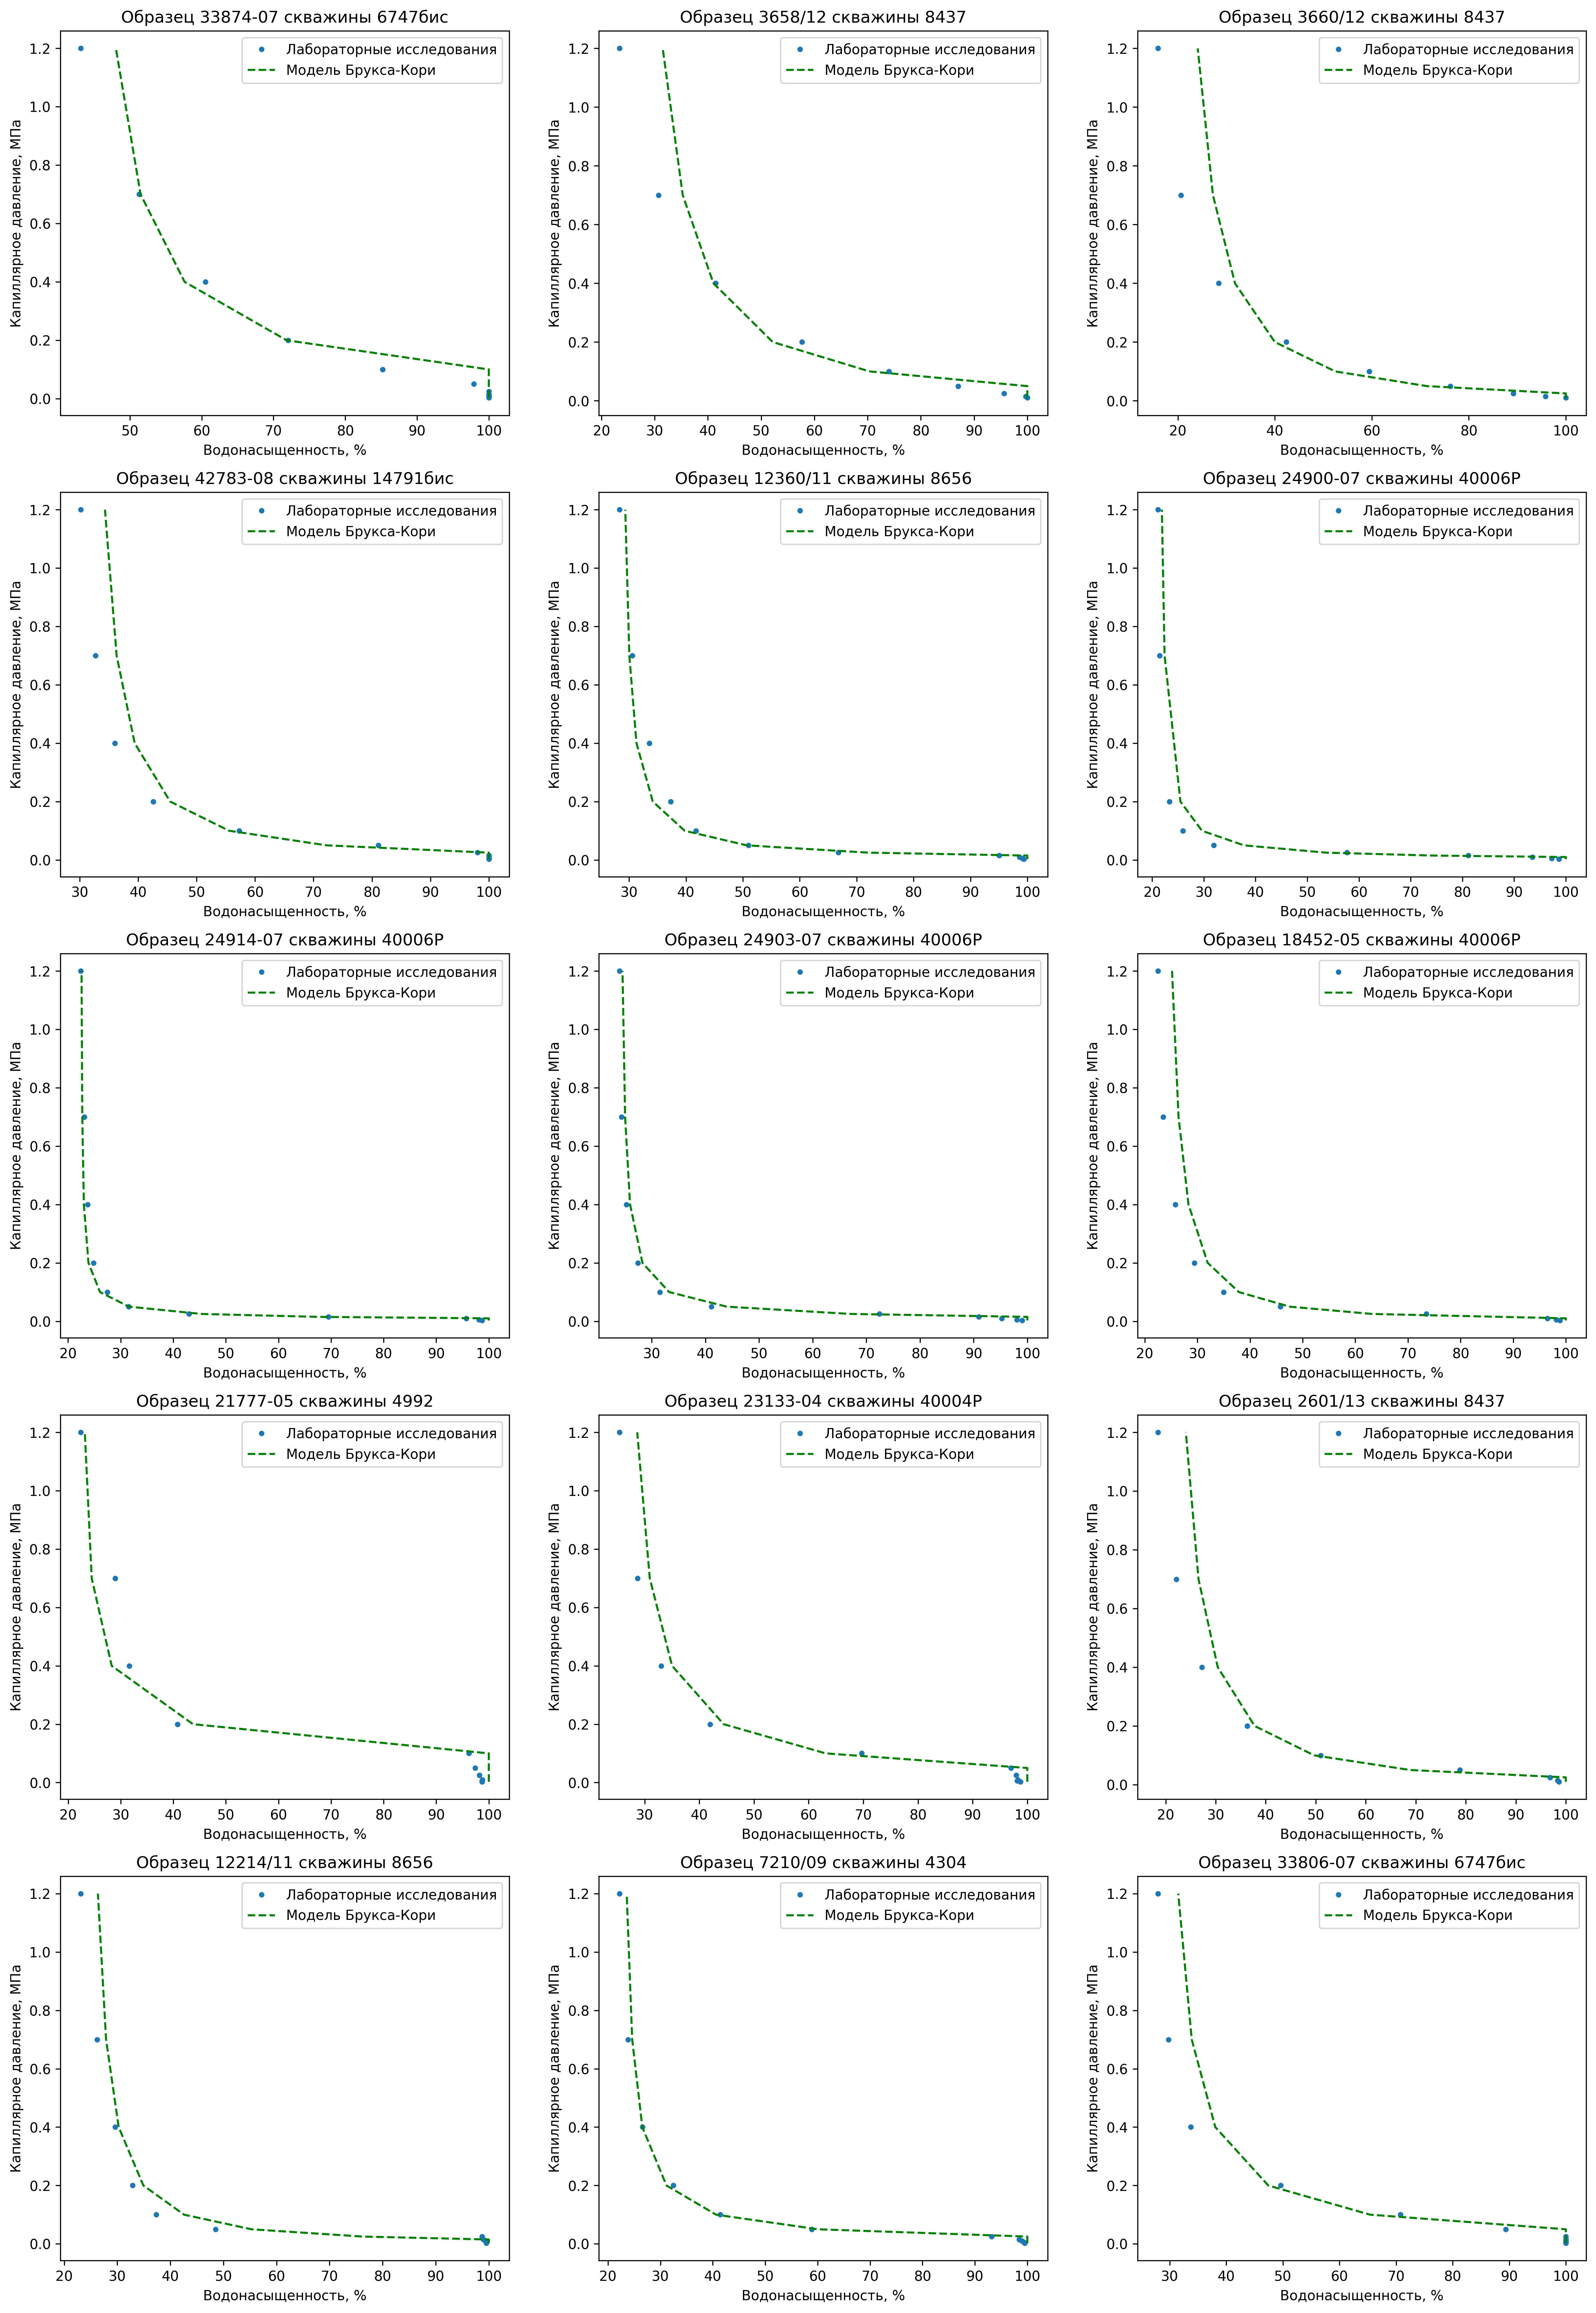

In [14]:
fig, ax = plt.subplots(int(len(Pd_wells)/3), 3,figsize=(20, 30), dpi = 300)
numb_str = 0

for i in range(len(Pd_wells)):
    df = data[data['Лабораторный номер образца'] == name_well_sample[i][0]]
    
    Sw = np.array(df['Водонасыщенность, %'])
    Swi = Sw.min()
    
    Pc = np.array(df['Капиллярное давление, МПа'])
    Pd = Pd_wells[i]
    
    optim = least_squares(optim_func, [1], args=(Sw[Pc >= Pd], Pc[Pc >= Pd], Swi, Pd))
    res = Swi+(100-Swi)*(Pd/Pc)**(1/optim.x[0])
    res = np.where(res > 100, 100, res)
    
    #Визуализация
    row = numb_str//3
    string = numb_str%3
    numb_str = numb_str + 1
    
    ax[row, string].plot(df['Водонасыщенность, %'], df['Капиллярное давление, МПа'], '.')
    ax[row, string].plot(res, Pc, 'g--')
    ax[row, string].set_xlabel('Водонасыщенность, %')
    ax[row, string].set_ylabel('Капиллярное давление, МПа')
    ax[row, string].legend(['Лабораторные исследования', 'Модель Брукса-Кори'])
    ax[row, string].set_title('Образец {} скважины {}'.format(name_well_sample[i][0], name_well_sample[i][1]));

Графики в логарифмическом масштабе

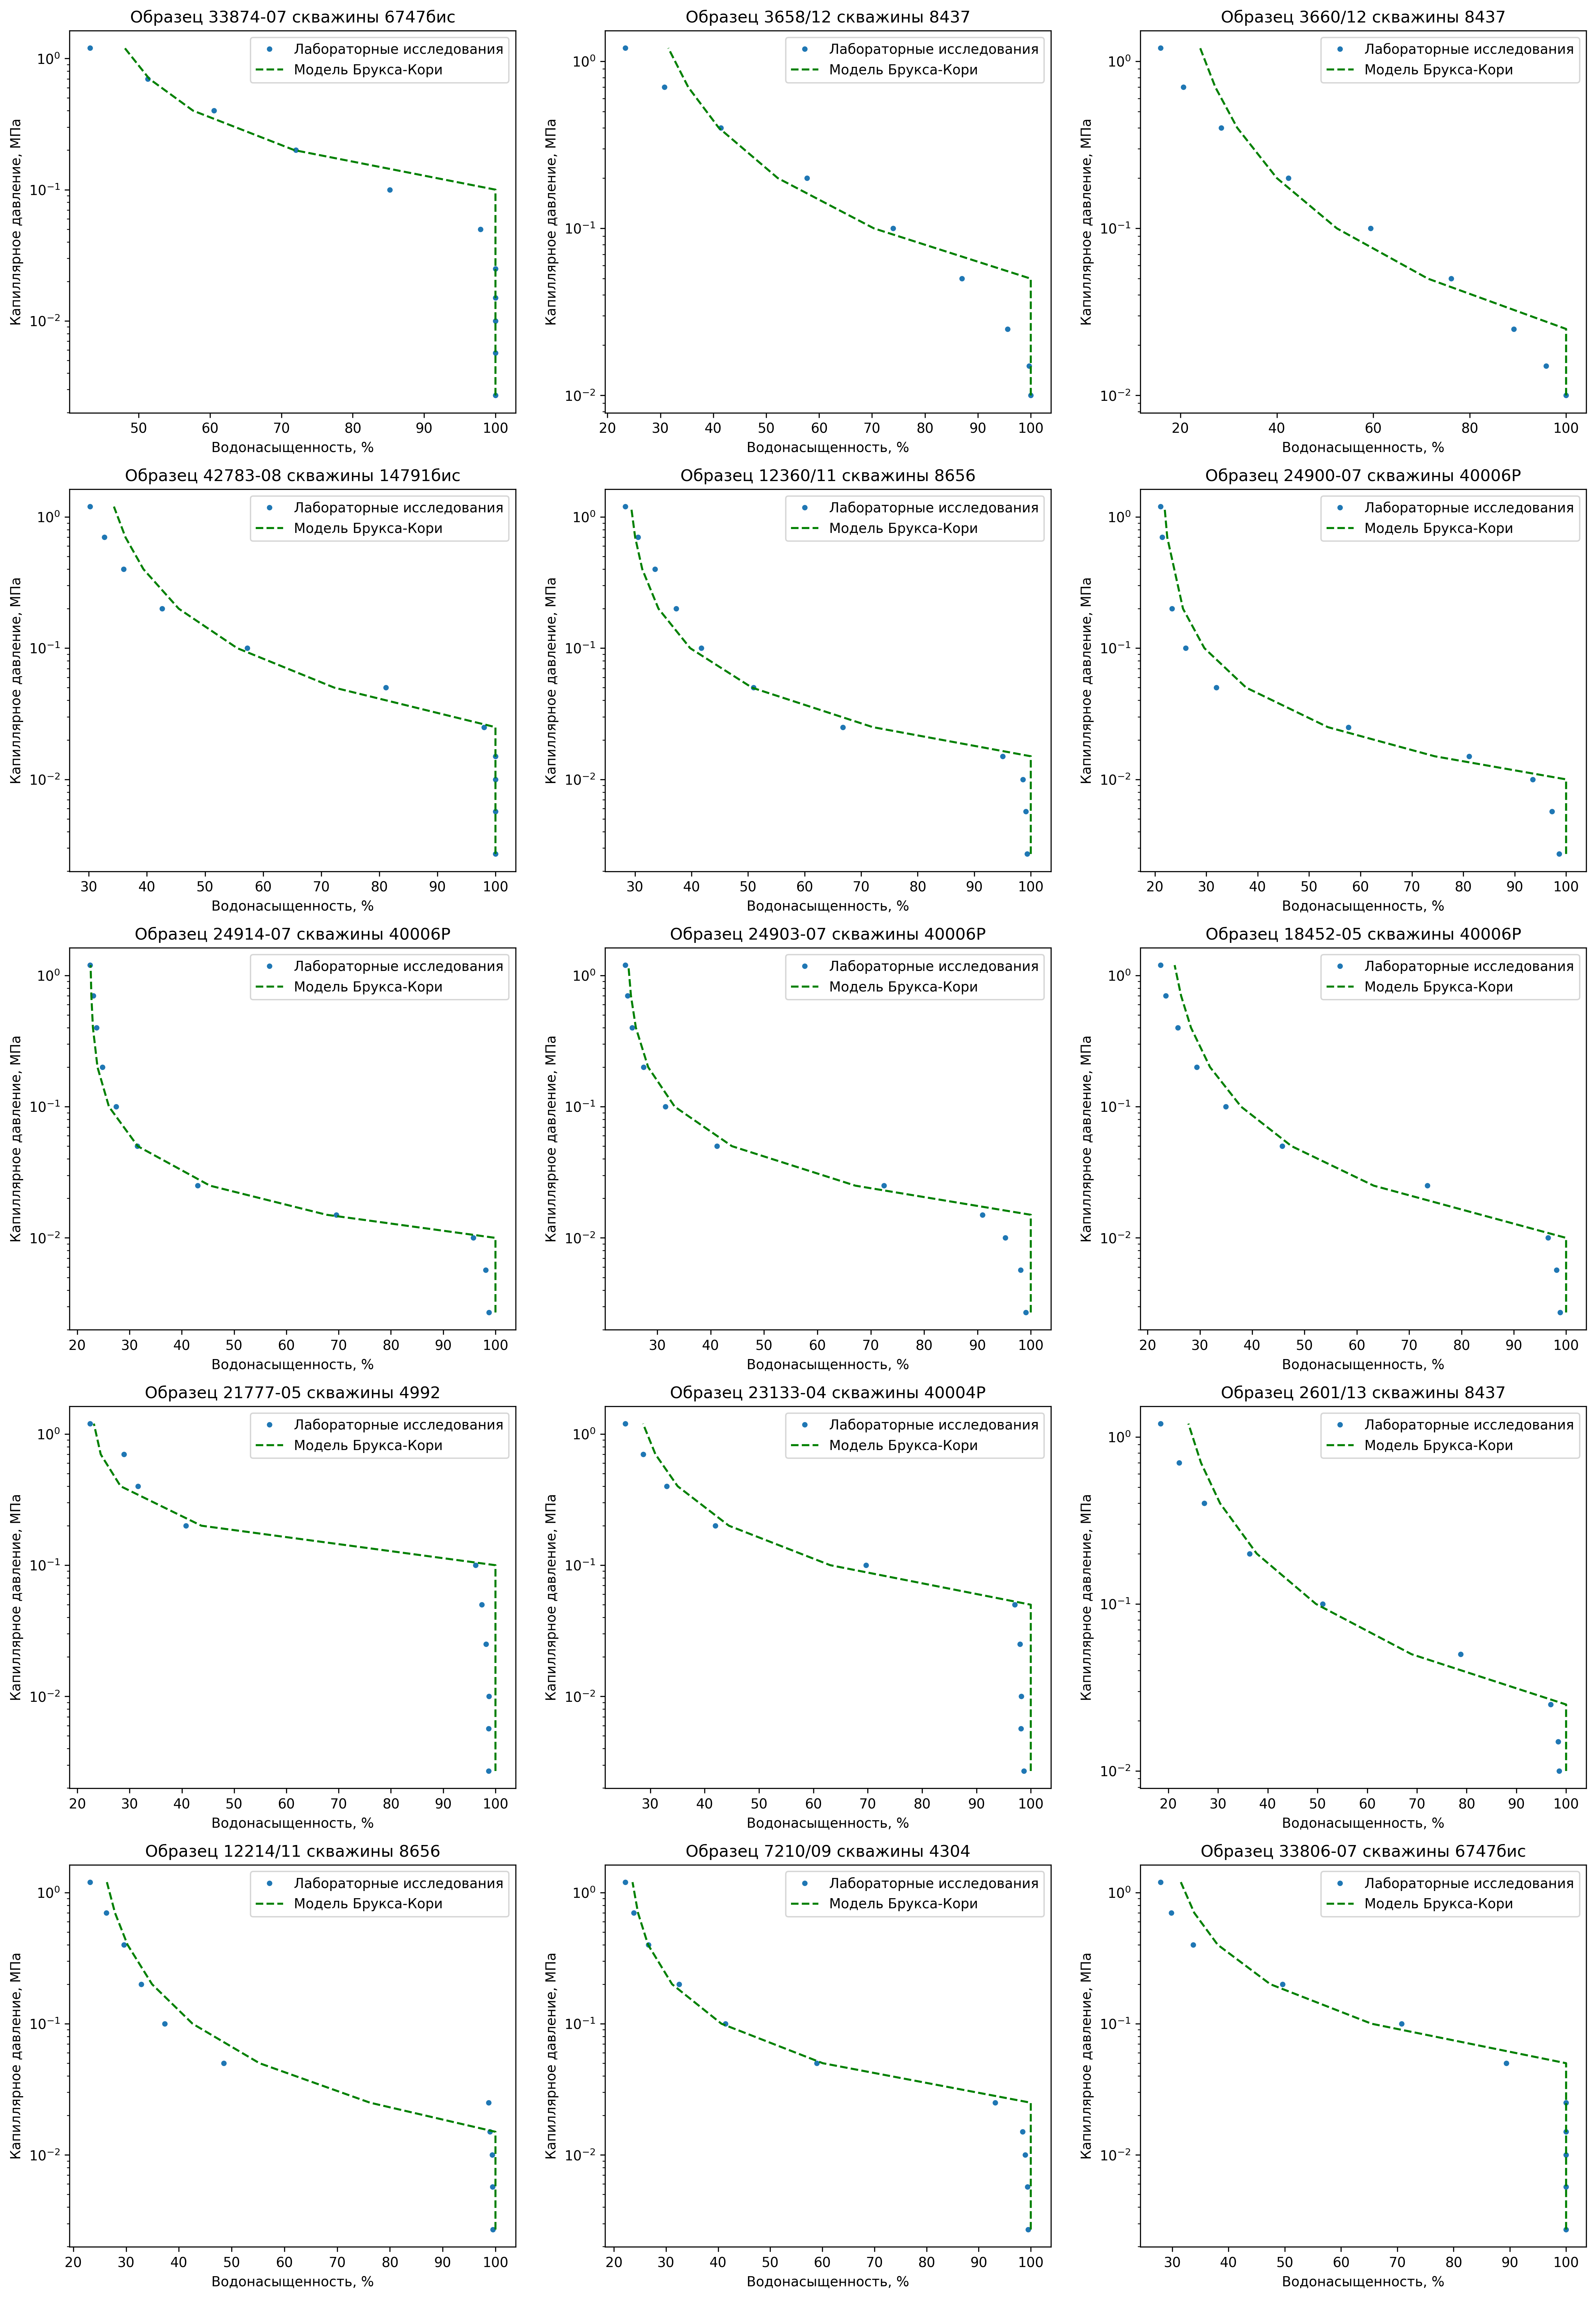

In [15]:
fig, ax = plt.subplots(int(len(Pd_wells)/3), 3,figsize=(20, 30), dpi = 300)
numb_str = 0

for i in range(len(Pd_wells)):
    df = data[data['Лабораторный номер образца'] == name_well_sample[i][0]]
    
    Sw = np.array(df['Водонасыщенность, %'])
    Swi = Sw.min()
    
    Pc = np.array(df['Капиллярное давление, МПа'])
    Pd = Pd_wells[i]
    
    optim = least_squares(optim_func, [1], args=(Sw[Pc >= Pd], Pc[Pc >= Pd], Swi, Pd))
    res = Swi+(100-Swi)*(Pd/Pc)**(1/optim.x[0])
    res = np.where(res > 100, 100, res)
    
    #Визуализация
    row = numb_str//3
    string = numb_str%3
    numb_str = numb_str + 1
    
    ax[row, string].plot(df['Водонасыщенность, %'], df['Капиллярное давление, МПа'], '.')
    ax[row, string].plot(res, Pc, 'g--')
    ax[row, string].set_yscale('log')
    ax[row, string].set_xlabel('Водонасыщенность, %')
    ax[row, string].set_ylabel('Капиллярное давление, МПа')
    ax[row, string].legend(['Лабораторные исследования', 'Модель Брукса-Кори'])
    ax[row, string].set_title('Образец {} скважины {}'.format(name_well_sample[i][0], name_well_sample[i][1]));